In [1]:
# Importamos nuestra librerías básicas
import numpy as np
import pandas as pd
import os
import random
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# Este paso es para que los resultados en vuestros notebooks sean iguales a lo de este
np.random.seed(42)


# Aprendizaje supervisado - Regresión Logistica

En este notebook vamos implementar la clasificación de digitos de la serie MNIST
En la mayoría de nuestros ejemplos utilizaremos la librería de Machine Learning 
Scikit-Learn.

# Como funciona la regresion logistica

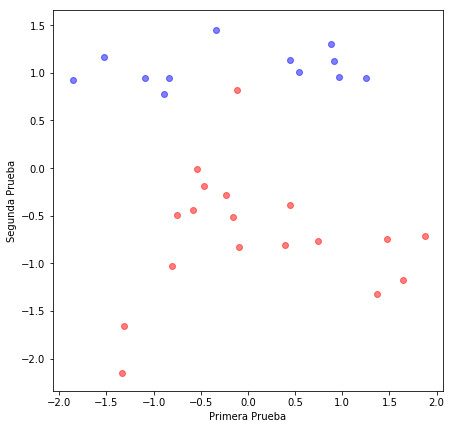

In [2]:
# Para empezar creamos un dataset ejemplo con sklearn
data = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0,
                           weights=[.6, .4], random_state=42)
# Separo entre *features* y el objetivo
scale = StandardScaler().fit(data[0])
features = scale.transform(data[0])
target = data[1]
# Dibujo las muestras
nok = features[target==0]
ok = features[target==1]
plt.figure(figsize=(7,7))
plt.xlabel("Primera Prueba")
plt.ylabel("Segunda Prueba")
plt.scatter(nok[:,0], nok[:,1], color="red", alpha=0.5)
plt.scatter(ok[:,0], ok[:,1], color="blue", alpha=0.5)
plt.show()

# Aplicamos la regresión logísitica para separar las muestras

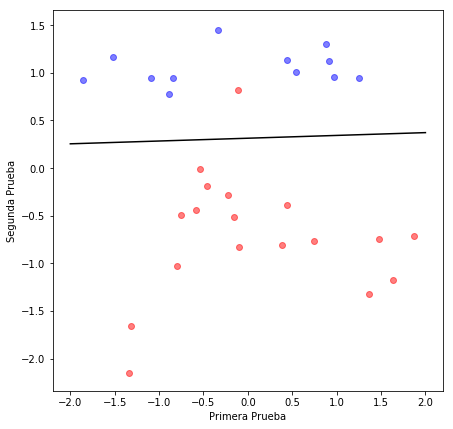

In [3]:
# Aplicamos la regresión logistica
log_reg = LogisticRegression().fit(features, target)
# Volvemos a dibujar las muestras
plt.figure(figsize=(7,7))
plt.xlabel("Primera Prueba")
plt.ylabel("Segunda Prueba")
plt.scatter(nok[:,0], nok[:,1], color="red", alpha=0.5)
plt.scatter(ok[:,0], ok[:,1], color="blue", alpha=0.5)
lin = np.array([-2,2])
w0 = log_reg.intercept_
w1,w2 = log_reg.coef_[0]
plt.plot(lin,(-w0-w1*lin)/w2,"k-")
plt.show()

# Ahora vamos aplicar la regresión logística a un dataset más complicado

In [4]:
# Aqui importamos los datos que vamos a clasificar

# Scikit-Learn ya incluye algunos datasets de ejemplo como el MNIST
mnist = fetch_mldata('MNIST original')

# El dataset contiene 70.000 ejemplos de digitos escritos a mano
# en blanco y negro. Cada digito esta representada por una imagen de 28x28 pixels.
# Además el dataset incluye el "target" i.e. el numero asociado con cada imagen.

# Otros datasets serían más rápidos de ejecutar, pero la ventaja de este es que,
# debido a su complejidad, cuando empecemos a utilizar modelos más complejos (como 
# redes neuronales), se empezarán a ver las ventajas de estos modelos más complejos

# Aqui cargamos nuestros ejemplos en X, el target en y. Nuestro objetivo con
# Machine Learning es aprender la función f(X) que genera y.
X, y = mnist["data"], mnist["target"]

## Separación del set de pruebas

In [5]:
# Nuestro objetivo es que la función aprendida funcione no solamente con
# el dataset de prueba, pero que también "generalize" bien para ejemplos
# que no haya visto antes.

# En esta sección separamos el dataset en 2 partes: el training set y test set
X_train_o, X_test_o, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Visualización de los datos

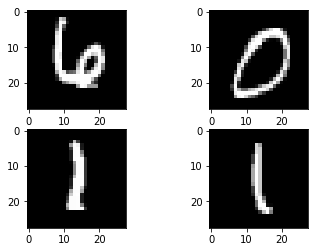

In [11]:
fig=plt.figure()
a=fig.add_subplot(2,2,1)
plt.imshow(np.reshape(X[random.randint(1,50000)], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,2)
plt.imshow(np.reshape(X[random.randint(1,50000)], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,3)
plt.imshow(np.reshape(X[random.randint(1,50000)], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,4)
plt.imshow(np.reshape(X[random.randint(1,50000)], [28, 28]),cmap="gray")
plt.show();

# Normalización de los datos (aka Feature Engineering)

In [7]:
# Antes de enviar los datos al modelo, hacemos una adaptación de los datos para normalizarlos
# Por normalización en este contexto la idea es remover la media de cada "feature"
# (i.e. centrar en zero) y dividir por la "variance", es decir hacer que los datos estén entre
# 0 y 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Regresión Logistica

In [8]:
# El problema que vamos a classificar tiene 768 dimensiones de entrada (28x28)
# La regresión logistica intentará definir una "línea" en este espacio multidimensional
# que mejor represente el dato

# Creamos el modelo que queremos usar
# Para la regresión logistica, hemos indicado que el modelo es para una
# clasificacion de multiplas clases
lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=0.1)

# Hacemos fit del modelo al dato de training
%time lr_clf.fit(X_train, y_train)

# Los modelos de Scikit-Learn ya vienen con funciones para evaluar el rendimiento del modelo
# Con este modelo sencillo hemos podido alcanzar una "exactitud" de mis previsiones de casi 90%
# Usamos "exactitud" para diferenciar de precisión que significa otra cosa en nuestras medidas
# rendimiento.
%time train_score = lr_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = lr_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)


Wall time: 9.77 s
Wall time: 125 ms
Rendimiento en el dataset de training: 0.8893
Wall time: 15.6 ms
Rendimiento en el dataset de pruebas: 0.8918


# Evaluación del Modelo

- Exactitud - Accuracy
- Precisión - Precision
- "Retirada" - Recall


In [9]:
# Los modelos de Scikit-Learn ya vienen con funciones para evaluar el rendimiento del modelo
# Con este modelo sencillo hemos podido alcanzar una "exactitud" de mis previsiones de casi 90%
# Usamos "exactitud" para diferenciar de precisión que significa otra cosa en nuestras medidas
# rendimiento.
%time train_score = lr_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = lr_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)


Wall time: 118 ms
Rendimiento en el dataset de training: 0.8893
Wall time: 15.6 ms
Rendimiento en el dataset de pruebas: 0.8918
